In [1]:
import numpy
data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')

In [4]:
max_inflammation_0 = numpy.amax(data, axis=0)[0]
max_inflammation_20 = numpy.amax(data, axis=0)[20]

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
elif numpy.sum(numpy.amin(data, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

Suspicious looking maxima!


In [6]:
data = numpy.loadtxt(fname='inflammation-03.csv', delimiter=',')

max_inflammation_0 = numpy.amax(data, axis=0)[0]
max_inflammation_20 = numpy.amax(data, axis=0)[20]

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
elif numpy.sum(numpy.amin(data, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

Minima add up to zero!


In [8]:
fahrenheit_val = 99
celsius_val = ((fahrenheit_val - 32) * (5/9))
print(celsius_val)

37.22222222222222


In [9]:
fahrenheit_val2 = 43
celsius_val2 = ((fahrenheit_val2 - 32) * (5/9))
print(celsius_val2)

6.111111111111112


In [10]:
def explicit_fahr_to_celsius(temp):
    # Assign the converted value to a variable
    converted = ((temp - 32) * (5/9))
    # Return the value of the new variable
    return converted
    
def fahr_to_celsius(temp):
    # Return converted value more efficiently using the return
    # function without creating a new variable. This code does
    # the same thing as the previous function but it is more explicit
    # in explaining how the return command works.
    return ((temp - 32) * (5/9))

In [11]:
fahr_to_celsius(32)

0.0

In [12]:
print('freezing point of water:', fahr_to_celsius(32), 'C')
print('boiling point of water:', fahr_to_celsius(212), 'C')

freezing point of water: 0.0 C
boiling point of water: 100.0 C


In [13]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print('freezing point of water in Kelvin:', celsius_to_kelvin(0.))

freezing point of water in Kelvin: 273.15


In [14]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


In [15]:
print('Again, temperature in Kelvin was:', temp_k)

NameError: name 'temp_k' is not defined

In [16]:
temp_kelvin = fahr_to_kelvin(212.0)
print('temperature in Kelvin was:', temp_kelvin)

temperature in Kelvin was: 373.15


In [17]:
def print_temperatures():
    print('temperature in Fahrenheit was:', temp_fahr)
    print('temperature in Kelvin was:', temp_kelvin)

temp_fahr = 212.0
temp_kelvin = fahr_to_kelvin(temp_fahr)

print_temperatures()

temperature in Fahrenheit was: 212.0
temperature in Kelvin was: 373.15


In [27]:
def visualize(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))
    
    image = matplotlib.pyplot.imshow(data)
    matplotlib.pyplot.show()


In [28]:
def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if numpy.amax(data, axis=0)[0] == 0 and numpy.amax(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.amin(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

In [29]:
import glob 
import matplotlib.pyplot

inflammation-01.csv


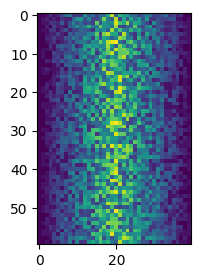

Suspicious looking maxima!
inflammation-02.csv


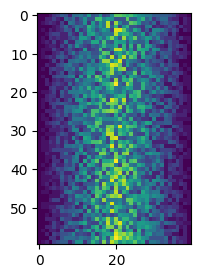

Suspicious looking maxima!
inflammation-03.csv


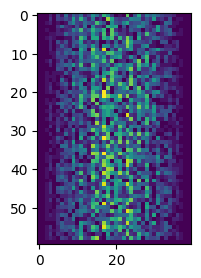

Minima add up to zero!


In [30]:
filenames = sorted(glob.glob('inflammation*.csv'))

for filename in filenames[:3]:
    print(filename)
    visualize(filename)
    detect_problems(filename)

In [31]:
def offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value

In [32]:
z = numpy.zeros((2, 2))
z

array([[0., 0.],
       [0., 0.]])

In [33]:
print(offset_mean(z, 3))

[[3. 3.]
 [3. 3.]]


In [36]:
z[1, 0] = 1

In [40]:
z - .25

array([[-0.25, -0.25],
       [ 0.75, -0.25]])

In [37]:
print(offset_mean(z, 3))

[[2.75 2.75]
 [3.75 2.75]]


In [38]:
numpy.mean(z)

np.float64(0.25)

In [41]:
data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')
print(offset_mean(data, 0))

[[-6.14875 -6.14875 -5.14875 ... -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ... -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ... -4.14875 -5.14875 -5.14875]
 ...
 [-6.14875 -5.14875 -5.14875 ... -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ... -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ... -5.14875 -5.14875 -6.14875]]


In [42]:
print('original min, mean, and max are:', numpy.amin(data), numpy.mean(data), numpy.amax(data))
offset_data = offset_mean(data, 0)
print('min, mean, and max of offset data are:',
      numpy.amin(offset_data),
      numpy.mean(offset_data),
      numpy.amax(offset_data))

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and max of offset data are: -6.14875 2.842170943040401e-16 13.85125


In [44]:
print('std dev before and after:', numpy.std(data), numpy.std(offset_data))

std dev before and after: 4.613833197118566 4.613833197118566


In [45]:
print('difference in standard deviations before and after:',
      numpy.std(data) - numpy.std(offset_data))

difference in standard deviations before and after: 0.0


In [ ]:
def offset_mean(data, target_mean_value):
    # offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value
    # return a new array containing the original data with its mean offset to match the desired value.

In [46]:
def offset_mean(data, target_mean_value):
    """Return a new array containing the original data
       with its mean offset to match the desired value."""
    return (data - numpy.mean(data)) + target_mean_value

In [47]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
    with its mean offset to match the desired value.



In [48]:
def offset_mean(data, target_mean_value):
    """Return a new array containing the original data
       with its mean offset to match the desired value.

    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])
    """
    return (data - numpy.mean(data)) + target_mean_value

help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
       with its mean offset to match the desired value.
    
    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])



In [49]:
data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')

In [50]:
data

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [52]:
data = numpy.loadtxt('inflammation-01.csv', delimiter=',')

In [53]:
data

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [54]:
data = numpy.loadtxt('inflammation-01.csv')

ValueError: could not convert string '0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0' to float64 at row 0, column 1.

In [55]:
def offset_mean(data, target_mean_value=0.0):
    """Return a new array containing the original data
       with its mean offset to match the desired value, (0 by default).

    Examples
    --------
    >>> offset_mean([1, 2, 3])
    array([-1.,  0.,  1.])
    """
    return (data - numpy.mean(data)) + target_mean_value

In [56]:
test_data = numpy.zeros((2, 2))
print(offset_mean(test_data, 3))

[[3. 3.]
 [3. 3.]]


In [57]:
more_data = 5 + numpy.zeros((2, 2))
print('data before mean offset:')
print(more_data)
print('offset data:')
print(offset_mean(more_data))

data before mean offset:
[[5. 5.]
 [5. 5.]]
offset data:
[[0. 0.]
 [0. 0.]]


In [59]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)


In [60]:
print('no parameters:')
display()

no parameters:
a: 1 b: 2 c: 3


In [61]:
print('one parameter:')
display(55)

one parameter:
a: 55 b: 2 c: 3


In [62]:
print('two parameters:')
display(55, 66)

two parameters:
a: 55 b: 66 c: 3


In [63]:
print('only setting the value of c')
display(c=77)

only setting the value of c
a: 1 b: 2 c: 77


In [64]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding=None, max_rows=None, *, quotechar=None, like=None)
    Load data from a text file.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return bytes or strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
 

In [65]:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

In [66]:
def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))